In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./_info.csv')
df = df.dropna()
print('report count:', len(df),', family count:', df['Family'].unique())
df.head(3)

report count: 45 , family count: ['dofloo' 'xorddos' 'Darlloz' 'lupper' 'Gafgyt' 'Luabot' 'Kaiten' 'Turla']


,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


### Plot completeness of ASG object (Gamma-old) in CTI documents
- scale min-max object count into [0,1]

Text(0.5, 0, 'Number of document')

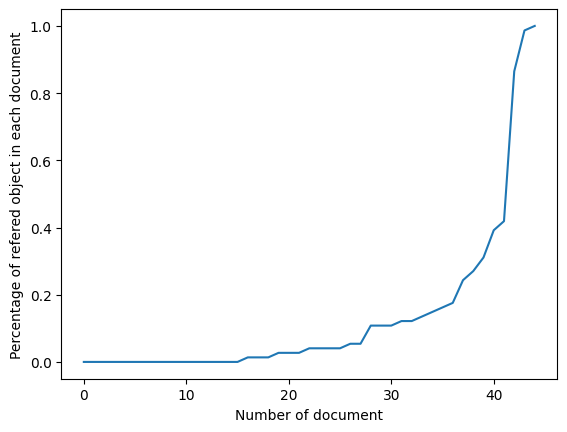

In [4]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

plt.plot(ioc_counts)
plt.ylabel("Percentage of refered ASG object in each document") # y label
plt.xlabel("Number of document") # x label

- 雙座標 (百分比和個數)
- 四分位數 (ing)

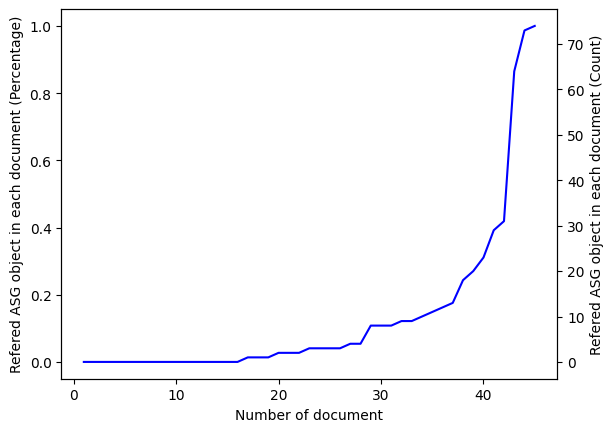

In [6]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']
ioc_percent = ioc_counts/max
ioc_percent = ioc_percent.sort_values()
ioc_percent = ioc_percent.to_list()
ioc_counts = sorted(ioc_counts.to_list())

x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-')

ax1.set_xlabel('Number of document')
ax1.set_ylabel('Refered ASG object in each document (Percentage)', color='black')
ax2.set_ylabel('Refered ASG object in each document (Count)', color='black')

plt.show()

### Plot completeness of STobject (Gamma-new) in CTI documents

Text(0.5, 0, 'Number of document')

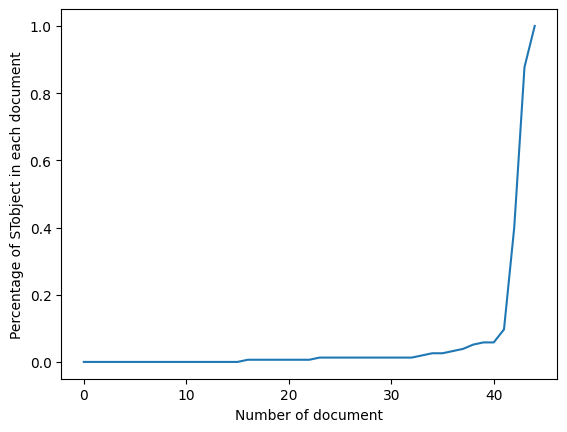

In [7]:
max = df['numOfSTobj'].max()
min = df['numOfSTobj'].min()

ioc_counts = df['numOfSTobj']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

plt.plot(ioc_counts)
plt.ylabel("Percentage of STobject in each document") # y label
plt.xlabel("Number of document") # x label